# Jupyter Notebook to demonstrate **Data Engineering** with **Pandas**  

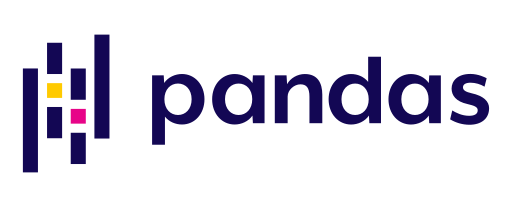

### What is Pandas?

Pandas is a Python library used for working with data sets.

It has functions for
+ cleaning   
+ exploring  
+ analyzing, and   
+ manipulating data

Pandas allows us to analyze big data and make conclusions based on statistical theories. Pandas can clean messy data sets, and make them readable and relevant.

Pandas is built around data structures called Series and **DataFrames**. A DataFrame is a 2-dimensional data structure of rows and columns, similar to a spreadsheet.

Data for these collections can be imported from various file formats such as *comma-separated values* (CSV), JSON, Parquet, *SQL database tables or queries*, and *Microsoft Excel*.

The name "Pandas" has a reference to both "**Pan**el **Da**ta" (an econometrics term for data sets that include observations over multiple time periods for the same individuals), and "Python Data Analysis"

Pandas was created by **Wes McKinney** in 2008.  The development of Pandas introduced into Python many comparable features of working with DataFrames that were established in the R programming language. The library is built upon another library, [NumPy](https://numpy.org/).


---   
Source/Links:
+ [Pandas Library](https://pandas.pydata.org/)  
+ [Pandas Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)


History:
+ Feb'2024 v1 dbe -- adapted for BINA FS24 (using the google colab blog article [10 Minutes to Pandas - in Colab](https://colab.google/articles/pandas))  

---

## Setup Environment


This is a short introduction to pandas, geared mainly for new users.  
You can see more complex recipes in the official <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Pandas Cookbook<a/>.

Customarily, we import `pandas` and `numpy` as follows:

In [1]:
import numpy as np
import pandas as pd

---   
## Object Creation - Series /Dataframes

+ **Series** is a *one-dimensional labeled array* capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the *index*  
+ **DataFrame** is a *2-dimensional labeled data structure with columns* of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Along with the data, you can optionally pass *index* (row labels) and columns (column labels) arguments. If axis labels are not passed, they will be constructed from the input data based on common sense rules.

*see the section [Intro to data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro) of the official [Pandas](https://pandas.pydata.org/docs/index.html) website*


### Series    
Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a **list of values**, letting pandas create a default integer **index**:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Dataframe   

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.269533,-0.256175,0.841631,-1.199992
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124
2013-01-03,-1.157696,1.429508,0.328579,0.673137
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302
2013-01-05,1.198142,-0.970289,0.986115,0.533231
2013-01-06,0.548376,1.678414,2.103593,0.517631


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing *a dictionary of objects* that can be converted into a series-like structure:

In [10]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [12]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



---  
## Viewing data   
*see the section [Basics](https://pandas.pydata.org/docs/user_guide/basics.html#basics) of the official [Pandas](https://pandas.pydata.org/docs/index.html) website*

### Head and Tail   
Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [14]:
df.head()

,A,B,C,D
2013-01-01,-0.269533,-0.256175,0.841631,-1.199992
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124
2013-01-03,-1.157696,1.429508,0.328579,0.673137
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302
2013-01-05,1.198142,-0.970289,0.986115,0.533231


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302
2013-01-05,1.198142,-0.970289,0.986115,0.533231
2013-01-06,0.548376,1.678414,2.103593,0.517631


### Index and Columns   
Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy:  
+ *NumPy arrays* have **one dtype for the entire array**,   
+ while pandas *DataFrames* have **one dtype per column**.  

When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [20]:
df.to_numpy()

array([[-0.26953276, -0.25617482,  0.84163125, -1.1999917 ],
       [-1.1595995 , -0.59631166, -0.51785356, -1.53212363],
       [-1.15769642,  1.42950769,  0.32857864,  0.67313692],
       [ 0.08145605, -2.12006418, -2.14049654, -0.6103018 ],
       [ 1.19814244, -0.9702887 ,  0.98611531,  0.53323139],
       [ 0.54837556,  1.67841448,  2.10359318,  0.51763081]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [21]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

### (Quick) Statistics Summary   
<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a **quick statistic summary** of your data:

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.126476,-0.139153,0.266928,-0.269736
std,0.938563,1.456141,1.458508,0.972491
min,-1.159600,-2.120064,-2.140497,-1.532124
25%,-0.935656,-0.876794,-0.306246,-1.052569
50%,-0.094038,-0.426243,0.585105,-0.046335
75%,0.431646,1.008087,0.949994,0.529331
max,1.198142,1.678414,2.103593,0.673137


### Transposing and Sorting   
Transposing the whole dataframe:

In [23]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.269533,-1.159600,-1.157696,0.081456,1.198142,0.548376
B,-0.256175,-0.596312,1.429508,-2.120064,-0.970289,1.678414
C,0.841631,-0.517854,0.328579,-2.140497,0.986115,2.103593
D,-1.199992,-1.532124,0.673137,-0.610302,0.533231,0.517631


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [26]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.199992,0.841631,-0.256175,-0.269533
2013-01-02,-1.532124,-0.517854,-0.596312,-1.159600
2013-01-03,0.673137,0.328579,1.429508,-1.157696
2013-01-04,-0.610302,-2.140497,-2.120064,0.081456
2013-01-05,0.533231,0.986115,-0.970289,1.198142
2013-01-06,0.517631,2.103593,1.678414,0.548376


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [30]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302
2013-01-05,1.198142,-0.970289,0.986115,0.533231
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124
2013-01-01,-0.269533,-0.256175,0.841631,-1.199992
2013-01-03,-1.157696,1.429508,0.328579,0.673137
2013-01-06,0.548376,1.678414,2.103593,0.517631


---  
## Selection   
In this section, we will focus on how to slice, dice, and generally get and set subsets of pandas objects.

*see the documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a> of the official [Pandas](https://pandas.pydata.org/docs/index.html) website*

> NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.



### Getting Subsets

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [31]:
df["A"]

2013-01-01   -0.269533
2013-01-02   -1.159600
2013-01-03   -1.157696
2013-01-04    0.081456
2013-01-05    1.198142
2013-01-06    0.548376
Freq: D, Name: A, dtype: float64

Selecting via `[]` (`__getitem__`), which slices the rows:

In [33]:
df[0:3]

,A,B,C,D
2013-01-01,-0.269533,-0.256175,0.841631,-1.199992
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124
2013-01-03,-1.157696,1.429508,0.328579,0.673137


In [34]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124
2013-01-03,-1.157696,1.429508,0.328579,0.673137
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [35]:
df.loc[dates[0]]

A   -0.269533
B   -0.256175
C    0.841631
D   -1.199992
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [36]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.269533,-0.256175
2013-01-02,-1.159600,-0.596312
2013-01-03,-1.157696,1.429508
2013-01-04,0.081456,-2.120064
2013-01-05,1.198142,-0.970289
2013-01-06,0.548376,1.678414


Showing label slicing, both endpoints are included:

In [37]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.159600,-0.596312
2013-01-03,-1.157696,1.429508
2013-01-04,0.081456,-2.120064


Reduction in the dimensions of the returned object:

In [38]:
df.loc["20130102", ["A", "B"]]

A   -1.159600
B   -0.596312
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [39]:
df.loc[dates[0], "A"]

np.float64(-0.26953275572042523)

For getting fast access to a scalar (equivalent to the prior method):

In [40]:
df.at[dates[0], "A"]

np.float64(-0.26953275572042523)

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [41]:
df.iloc[3]

A    0.081456
B   -2.120064
C   -2.140497
D   -0.610302
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [42]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.081456,-2.120064
2013-01-05,1.198142,-0.970289


By lists of integer position locations, similar to the NumPy/Python style:

In [43]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.159600,-0.517854
2013-01-03,-1.157696,0.328579
2013-01-05,1.198142,0.986115


For slicing rows explicitly:

In [44]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124
2013-01-03,-1.157696,1.429508,0.328579,0.673137


For slicing columns explicitly:

In [45]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.256175,0.841631
2013-01-02,-0.596312,-0.517854
2013-01-03,1.429508,0.328579
2013-01-04,-2.120064,-2.140497
2013-01-05,-0.970289,0.986115
2013-01-06,1.678414,2.103593


For getting a value explicitly:

In [46]:
df.iloc[1, 1]

np.float64(-0.5963116557415552)

For getting fast access to a scalar (equivalent to the prior method):

In [47]:
df.iat[1, 1]

np.float64(-0.5963116557415552)

### Boolean indexing

Using a single column’s values to select data:

In [49]:
df[df["A"] > 0]

,A,B,C,D
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302
2013-01-05,1.198142,-0.970289,0.986115,0.533231
2013-01-06,0.548376,1.678414,2.103593,0.517631


Selecting values from a DataFrame where a boolean condition is met:

In [50]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.841631,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,1.429508,0.328579,0.673137
2013-01-04,0.081456,NaN,NaN,NaN
2013-01-05,1.198142,NaN,0.986115,0.533231
2013-01-06,0.548376,1.678414,2.103593,0.517631


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [51]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.269533,-0.256175,0.841631,-1.199992,one
2013-01-02,-1.159600,-0.596312,-0.517854,-1.532124,one
2013-01-03,-1.157696,1.429508,0.328579,0.673137,two
2013-01-04,0.081456,-2.120064,-2.140497,-0.610302,three
2013-01-05,1.198142,-0.970289,0.986115,0.533231,four
2013-01-06,0.548376,1.678414,2.103593,0.517631,three


In [52]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.157696,1.429508,0.328579,0.673137,two
2013-01-05,1.198142,-0.970289,0.986115,0.533231,four


### Setting (new) Subsets

Setting a new column automatically aligns the data by the indexes:

In [53]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [54]:
df["F"] = s1

Setting values by label:

In [55]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [56]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [57]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.841631,5.0,NaN
2013-01-02,-1.159600,-0.596312,-0.517854,5.0,1.0
2013-01-03,-1.157696,1.429508,0.328579,5.0,2.0
2013-01-04,0.081456,-2.120064,-2.140497,5.0,3.0
2013-01-05,1.198142,-0.970289,0.986115,5.0,4.0
2013-01-06,0.548376,1.678414,2.103593,5.0,5.0


A `where` operation with setting:

In [59]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.841631,-5.0,NaN
2013-01-02,-1.159600,-0.596312,-0.517854,-5.0,-1.0
2013-01-03,-1.157696,-1.429508,-0.328579,-5.0,-2.0
2013-01-04,-0.081456,-2.120064,-2.140497,-5.0,-3.0
2013-01-05,-1.198142,-0.970289,-0.986115,-5.0,-4.0
2013-01-06,-0.548376,-1.678414,-2.103593,-5.0,-5.0


---   
## Missing data   

Pandas uses different sentinel values to represent a missing (also referred to as **NA**) depending on the data type.

*see the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section*

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [60]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.841631,5.0,NaN,1.0
2013-01-02,-1.159600,-0.596312,-0.517854,5.0,1.0,1.0
2013-01-03,-1.157696,1.429508,0.328579,5.0,2.0,NaN
2013-01-04,0.081456,-2.120064,-2.140497,5.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [61]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.1596,-0.596312,-0.517854,5.0,1.0,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [62]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.841631,5.0,5.0,1.0
2013-01-02,-1.159600,-0.596312,-0.517854,5.0,1.0,1.0
2013-01-03,-1.157696,1.429508,0.328579,5.0,2.0,5.0
2013-01-04,0.081456,-2.120064,-2.140497,5.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [63]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


---  
## Operations   

Series and DataFrame have the binary comparison methods `eq`, `ne`, `lt`, `gt`, `le`, and `ge` whose behavior is analogous to the well known binary arithmetic operations.

But there are quite a bunch of helpful operations on`Series`or `Dataframe`objects in pandas.

*see the basic section on [Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Descriptive Statistics

> Note: Operations in general **exclude missing data**.

Performing a *descriptive statistic*:


In [64]:
df.head()

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.841631,5.0,NaN
2013-01-02,-1.159600,-0.596312,-0.517854,5.0,1.0
2013-01-03,-1.157696,1.429508,0.328579,5.0,2.0
2013-01-04,0.081456,-2.120064,-2.140497,5.0,3.0
2013-01-05,1.198142,-0.970289,0.986115,5.0,4.0


In [65]:
df.mean()

A   -0.081554
B   -0.096457
C    0.266928
D    5.000000
F    3.000000
dtype: float64

In [66]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.0,5.000000
mean,-0.081554,-0.096457,0.266928,5.0,3.000000
std,0.936795,1.455779,1.458508,0.0,1.581139
min,-1.159600,-2.120064,-2.140497,5.0,1.000000
25%,-0.868272,-0.876794,-0.306246,5.0,2.000000
50%,0.040728,-0.298156,0.585105,5.0,3.000000
75%,0.431646,1.072131,0.949994,5.0,4.000000
max,1.198142,1.678414,2.103593,5.0,5.000000


### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    3
3    3
4    6
5    2
6    3
7    4
8    3
9    3
dtype: int32

In [69]:
s.value_counts()

3    6
1    1
6    1
2    1
4    1
Name: count, dtype: int64

### Apply (user defined) Function   

An alternative to using a loop to **iterate over a DataFrame** is to use the pandas `.apply()` method. This function acts as a `map()` function in Python. It takes a function as an input and applies this function to an entire DataFrame.

If you are working with tabular data, you must specify an axis you want your function to act on (0 for columns; and 1 for rows)

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [70]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.841631,5.0,NaN
2013-01-02,-1.159600,-0.596312,0.323778,10.0,1.0
2013-01-03,-2.317296,0.833196,0.652356,15.0,3.0
2013-01-04,-2.235840,-1.286868,-1.488140,20.0,6.0
2013-01-05,-1.037697,-2.257157,-0.502025,25.0,10.0
2013-01-06,-0.489322,-0.578742,1.601568,30.0,15.0


In [71]:
df.apply(lambda x: x.max() - x.min())

A    2.357742
B    3.798479
C    4.244090
D    0.000000
F    4.000000
dtype: float64

### String Methods

*Series* is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below.   
Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them).   
*See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods)*

In [72]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

---   
## Merge

pandas provides various methods for combining and comparing *Series* or *DataFrame* objects.

+ `concat()`: Merge multiple Series or DataFrame objects along a shared index or column

+ `DataFrame.join()`: Merge multiple DataFrame objects along the columns

+ `DataFrame.combine_first()`: Update missing values with non-missing values in the same location

+ `merge()`: Combine two Series or DataFrame objects with SQL-style joining

+ `merge_ordered()`: Combine two Series or DataFrame objects along an ordered axis

+ `merge_asof()`: Combine two Series or DataFrame objects by near instead of exact matching keys

+ `Series.compare()` and `DataFrame.compare()`: Show differences in values between two Series or DataFrame objects

*see the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)*

### Concat   

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

**Concatenating** pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.059468,0.131642,-1.181814,-0.241659
1,0.003302,0.505087,-0.217420,0.381571
2,-0.379942,0.359351,0.299100,-1.881509
3,-0.122795,-0.245575,-0.332927,-1.184479
4,0.356328,-0.530181,0.288616,-0.184648
5,-0.805550,-1.739623,0.656654,1.281539
6,0.172918,-2.194211,-0.300868,-1.134621
7,-1.174167,-0.151690,0.686056,0.578245
8,-0.677966,-1.137170,-0.373094,-1.481143
9,-0.609039,-0.217974,-0.244844,1.881982


In [74]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.059468,0.131642,-1.181814,-0.241659
1,0.003302,0.505087,-0.217420,0.381571
2,-0.379942,0.359351,0.299100,-1.881509
3,-0.122795,-0.245575,-0.332927,-1.184479
4,0.356328,-0.530181,0.288616,-0.184648
5,-0.805550,-1.739623,0.656654,1.281539
6,0.172918,-2.194211,-0.300868,-1.134621
7,-1.174167,-0.151690,0.686056,0.578245
8,-0.677966,-1.137170,-0.373094,-1.481143
9,-0.609039,-0.217974,-0.244844,1.881982


> NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join   
*see the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section*

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns.

In [75]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

print(left)
print(right)

pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [76]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

print(left)
print(right)

pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [77]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.078278,0.471287
1,bar,one,-0.067863,0.350036
2,foo,two,0.247045,-0.364534
3,bar,three,-0.871974,-1.363490
4,foo,two,0.678407,-0.274225
5,bar,two,-0.626021,1.213025
6,foo,one,0.490220,0.685307
7,bar,three,-0.536047,0.299657


**Grouping** and then **applying the `sum()` function** to the resulting group:

In [78]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-2.101905,0.499228
foo,0.337393,0.517834


**Grouping by multiple columns** forms a hierarchical index, and again we can apply the `sum()` function:

In [79]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.067863  0.350036
    three -1.408021 -1.063833
    two   -0.626021  1.213025
foo one   -0.588059  1.156593
    two    0.925452 -0.638759

## Reshaping

pandas provides methods for manipulating a Series and DataFrame object to **alter the representation of the data** for further data processing or data summarization.

+ `pivot()` and pivot_table(): Group unique values within one or more discrete categories.

+ `stack()` and `unstack()`: Pivot a column or row level to the opposite axis respectively.

+ `melt()` and `wide_to_long()`: Unpivot a wide DataFrame to a long format.

+ `get_dummies()` and `from_dummies()`: Conversions with indicator variables.

+ `explode()`: Convert a column of list-like values to individual rows.

+ `crosstab()`: Calculate a cross-tabulation of multiple 1 dimensional factor arrays.

+ `cut()`: Transform continuous variables to discrete, categorical values

+ `factorize()`: Encode 1 dimensional variables into integer labels.

*See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking)*

### Pivot

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [80]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.204000,0.941194
1,one,B,foo,-0.304349,-1.024251
2,two,C,foo,-0.821367,0.655092
3,three,A,bar,-0.113987,0.164546
4,one,B,bar,0.411886,0.283828
5,one,C,bar,1.068651,-0.333455
6,two,A,foo,-0.468932,0.544751
7,three,B,foo,-1.327931,0.499279
8,one,C,foo,0.294331,0.017950
9,one,A,bar,1.053269,-0.584241


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [81]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.053269  1.204000
      B  0.411886 -0.304349
      C  1.068651  0.294331
three A -0.113987       NaN
      B       NaN -1.327931
      C -0.098567       NaN
two   A       NaN -0.468932
      B  2.670047       NaN
      C       NaN -0.821367

In [82]:
stacked.unstack(0)

NameError: name 'stacked' is not defined

### Stack

In [83]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.197297 -0.965119
      two     1.144122 -0.378025
baz   one    -1.983039  0.437316
      two     1.328333  0.394591

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [84]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.197297
               B   -0.965119
       two     A    1.144122
               B   -0.378025
baz    one     A   -1.983039
               B    0.437316
       two     A    1.328333
               B    0.394591
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [85]:
stacked.unstack()

A         B
first second                    
bar   one    -1.197297 -0.965119
      two     1.144122 -0.378025
baz   one    -1.983039  0.437316
      two     1.328333  0.394591

In [86]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.197297  1.144122
      B -0.965119 -0.378025
baz   A -1.983039  1.328333
      B  0.437316  0.394591

---   
## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

*See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section*

### Resampling   
or converting a time series to a particular frequency

In [87]:
rng = pd.date_range("1/1/2012", periods=24, freq="H")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

C:\Users\Donat\AppData\Local\Temp\ipykernel_17080\1402105585.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rng = pd.date_range("1/1/2012", periods=24, freq="H")


2012-01-01 00:00:00    175
2012-01-01 01:00:00    268
2012-01-01 02:00:00    356
2012-01-01 03:00:00    129
2012-01-01 04:00:00    383
2012-01-01 05:00:00    261
2012-01-01 06:00:00    255
2012-01-01 07:00:00    378
2012-01-01 08:00:00     18
2012-01-01 09:00:00    303
2012-01-01 10:00:00    419
2012-01-01 11:00:00    437
2012-01-01 12:00:00    234
2012-01-01 13:00:00     46
2012-01-01 14:00:00    356
2012-01-01 15:00:00    416
2012-01-01 16:00:00    163
2012-01-01 17:00:00    226
2012-01-01 18:00:00    477
2012-01-01 19:00:00    390
2012-01-01 20:00:00    159
2012-01-01 21:00:00    374
2012-01-01 22:00:00    233
2012-01-01 23:00:00    357
Freq: h, dtype: int32

In [88]:
ts.resample("4h").mean()

2012-01-01 00:00:00    232.00
2012-01-01 04:00:00    319.25
2012-01-01 08:00:00    294.25
2012-01-01 12:00:00    263.00
2012-01-01 16:00:00    314.00
2012-01-01 20:00:00    280.75
Freq: 4h, dtype: float64

In [89]:
ts.resample("4h").sum()

2012-01-01 00:00:00     928
2012-01-01 04:00:00    1277
2012-01-01 08:00:00    1177
2012-01-01 12:00:00    1052
2012-01-01 16:00:00    1256
2012-01-01 20:00:00    1123
Freq: 4h, dtype: int32

### Localizing


[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a **time zone**:

In [91]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.956887
2012-03-07    1.032120
2012-03-08   -1.318503
2012-03-09    0.648636
2012-03-10    0.770768
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.956887
2012-03-07 00:00:00+00:00    1.032120
2012-03-08 00:00:00+00:00   -1.318503
2012-03-09 00:00:00+00:00    0.648636
2012-03-10 00:00:00+00:00    0.770768
Freq: D, dtype: float64

Converting between time span representations (e.g. month ("M") to day):



In [92]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

C:\Users\Donat\AppData\Local\Temp\ipykernel_17080\100813781.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range("1/1/2012", periods=5, freq="M")


2012-01   -0.974022
2012-02   -0.160928
2012-03    0.429580
2012-04    1.146083
2012-05   -0.809501
Freq: M, dtype: float64

In [93]:
ps.to_timestamp()

2012-01-01   -0.974022
2012-02-01   -0.160928
2012-03-01    0.429580
2012-04-01    1.146083
2012-05-01   -0.809501
Freq: MS, dtype: float64

### Conversions

>Converting between period and timestamp enables some convenient arithmetic functions to be used.

In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [94]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

C:\Users\Donat\AppData\Local\Temp\ipykernel_17080\1675664520.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


1990-03-01 09:00   -1.368450
1990-06-01 09:00    0.845771
1990-09-01 09:00   -0.266939
1990-12-01 09:00    0.004520
1991-03-01 09:00    0.192036
Freq: h, dtype: float64

---   
## Categoricals

pandas can include **categorical data** in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame).

Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values. Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

In contrast to statistical categorical variables, categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’), but numerical operations (additions, divisions, …) are not possible.

All values of categorical data are either in categories or `np.nan`. Order is defined by the order of categories, not lexical order of the values. Internally, the data structure consists of a categories array and an integer array of codes which point to the real value in the categories array.

*For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).*

In [95]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


**Converting** the raw grades to a categorical data type:

In [96]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

**Rename** the categories to more meaningful names:

In [97]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


**Reorder** the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [98]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

**Sorting** is per order in the categories, not lexical order:

In [100]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


**Grouping** by a categorical column also shows empty categories:

In [101]:
df.groupby("grade").size()

C:\Users\Donat\AppData\Local\Temp\ipykernel_17080\3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64